Olá, Lordm

Meu nome é Ramon. Ao ao longo do texto farei algumas observações sobre melhorias no código. Nas partes em que não houver comentários, está tudo certo, ok? Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser consertado, caso contrário seu projeto **não** será aceito.
</div>

Você pode me responder usando isso:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

###

<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um bom trabalho.

Como pontos fortes do projeto, destaco:
- Código simples e eficiente (sem loop desnecessário)
- Uso adequado dos recursos da lição

    
<span class="text-danger">Porém, há espaço para melhorias: </span>
 * <span class="text-danger"> ajustar teste de hipótese </span>


Portanto, sugiro que você corrija os pontos indicados.
    
Se você tiver alguma dúvida sobre de algo que você não tenha entendido, sinta-se à vontade para perguntar ao tutor ou deixar um comentário em **azul** para que, na próxima iteração, eu possa responder.

Conte conosco. Lembre-se de que você pode tirar dúvidas com revisores usando os comentários ou buscar ajuda de um tutor.
Bom trabalho. 


</div>




<div class="alert alert-block alert-success">
<b> Comentário Geral do Revisor Final: </b> <a class="tocSkip"></a>

Tudo certo agora. Desejo sucesso na jornada. Parabéns pelo empenho.
</div>

# Etapa 1: Leitura de Datasets e importação de pacotes.

In [1]:
# importando pacotes
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import scipy.stats as st
# lendo datasets
df = pd.read_csv('/datasets/games.csv')

# Etapa 2: Pré-Processamento de dados

In [2]:
# renomeando colunas
new_cols = []
for col in df.columns:
    col = col.strip().lower().replace(' ', '_')
    new_cols.append(col)
df.columns = new_cols

# arrumando tipo de dado
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce')
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Dica de código mais "pythônico": df.columns.str.lower().strip().replace()

</div>


os dados em `year_of_release` e `user_score` foram alterados do tipo objeto (string) para o tipo numérico e os nomes das colunas foram retificados

In [3]:
# indentificando valores ausentes
print(df[df['genre'].isna()])
print(f"\nquantidade de valores de ano de lançamento nulos: {df['year_of_release'].isna().sum()}")

# calculando o total de vendas para cada jogo e adicionando-o e uma nova coluna
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']


      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08           NaN         NaN    NaN  
14244         0.00           NaN         NaN    NaN  

quantidade de valores de ano de lançamento nulos: 269


## Etapa 2.1: Tratando valores ausentes

In [4]:
# removendo as colunas com genre ausente
df.dropna(subset = ['genre'], inplace = True)


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O ideal é substituir por 'ausente' mas como são apenas 2 registros não há tanto mal
</div>


Removida as duas colunas cujos dados do jogo eram ausentes

In [5]:
# encontrando jogos cujos YOR estão no nome e colocando na coluna certa.
null_amount = df[df['year_of_release'].isna()]['name'].count()
for index, row in df[df['year_of_release'].isna()].sort_values(by = 'name').iterrows():
    try:
        if int(row['name'][-4:]) > 1900:
            year = int(row['name'][-4:])
            df.loc[index, 'year_of_release'] = year
    except ValueError:
        pass
null_amount = null_amount - df[df['year_of_release'].isna()]['name'].count()
print(f"{null_amount} entradas corrigidas")

15 entradas corrigidas



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Inteligente! Parabéns
</div>


In [6]:
# encontrando jogos cujas entradas em uma plataforma tem o YOR, mas em outras, não.
null_amount = df[df['year_of_release'].isna()]['name'].count()
names = df[df['year_of_release'].isna()]['name'] 
dictionary = {}
for index, row in df.query('name in @names').sort_values('year_of_release').iterrows():
    year = row['year_of_release']
    name = row['name']
    try:
        year = int(year)
        dictionary[name] = year
    except ValueError:
        if name in dictionary:
            df.loc[index, 'year_of_release'] = dictionary[name] 
null_amount = null_amount - df[df['year_of_release'].isna()]['name'].count()
print(f"{null_amount} entradas corrigidas")


115 entradas corrigidas



<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Loop é lento entaõ devemos evitar. Opçaõ é aplicar groupby e pegar o menor ano do jogo mas em outra plataforma
</div>


Foram encontradas entradas com o ano de lançamento no nome e encontradas entradas com ano de lançamento faltando mas que o dado se encontra em outra entrada do jogo. 
os restantes dados ausentes serão deixados para não influenciar a análise de dados posterior.

# Etapa 3: Analisando os dados

## Etapa 3.1: Escolhendo período de análise

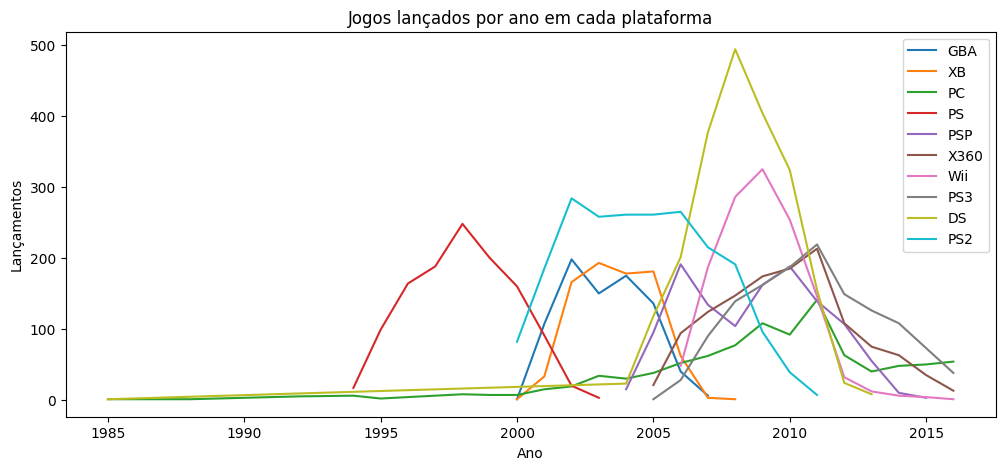

year_of_release
2010.0    1271
2011.0    1154
2012.0     662
2013.0     547
2014.0     582
2015.0     606
2016.0     502
Name: name, dtype: int64


In [7]:
# verificando quantos jogos foram lançados a cada ano
releases_yrly = df['year_of_release'].value_counts()
# vendo a variação de vendas de cada plataforma
releases_plats = df['platform'].value_counts()
# construindo distribuição de cada ano para as plataformas e indentificando as top10
releases_plats_yrly = df.groupby('platform')['year_of_release'].value_counts().rename('entries').reset_index()
top_10 = df.groupby('platform')['name'].count().sort_values().tail(10)
#criando um gráfico da quantidade de jogos lançados por plataforma
plt.figure(figsize=(12,5))
for plat in top_10.index:
    temp = releases_plats_yrly[releases_plats_yrly['platform'] == plat].sort_values('year_of_release')
    plt.plot(temp['year_of_release'], temp['entries'], label=plat)    
plt.xlabel('Ano')
plt.ylabel('Lançamentos')
plt.title('Jogos lançados por ano em cada plataforma')
plt.legend()
plt.show()
# investigando a queda abrupta observada no gráfico
print(df.groupby('year_of_release')['name'].count().tail(7))

A partir da análise da construção do gráfico, é possível perceber uma clara mudança no mercado de jogos a partir do ano 2012, por isso este será o periodo selecionado.

## Etapa 3.2: Escolhendo plataformas liderando em vendas

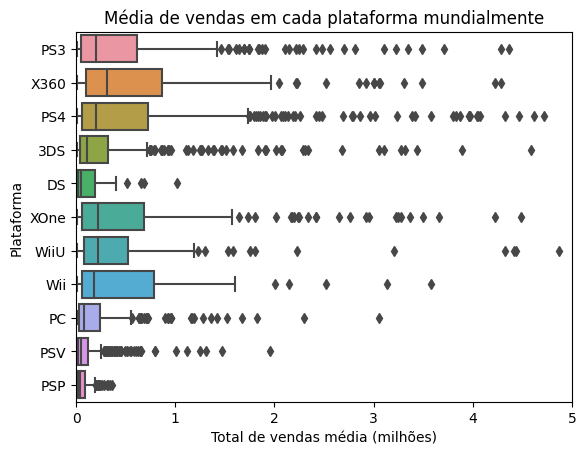

In [8]:
# criando novo Dataframe com os dados a partir do ano 2012
df_filtrado = df.query('year_of_release >= 2012')
# criando boxplot para as vendas globais dos jogos
ax = sns.boxplot(data=df_filtrado, x="total_sales", y="platform")
ax.set_xlabel('Total de vendas média (milhões)')
ax.set_ylabel('Plataforma')
ax.set_title('Média de vendas em cada plataforma mundialmente')
ax.set_xlim(0, 5)
plt.show()

In [9]:
df_filtrado.groupby('platform')['total_sales'].mean().sort_values(ascending = False)

platform
X360    0.807891
PS4     0.801378
Wii     0.665455
XOne    0.645020
PS3     0.586457
WiiU    0.559116
3DS     0.491209
DS      0.412812
PC      0.249059
PSV     0.119659
PSP     0.066800
Name: total_sales, dtype: float64

PSP, PC e PSV têm valores muito baixos e serão desconsiderados da análise

In [10]:
# removendo as plataformas
select_plats = list(df_filtrado['platform'].unique())
select_plats.remove('PC')
select_plats.remove('PSV')
select_plats.remove('PSP')
df_filtrado = df_filtrado.query('platform in @select_plats')

## Etapa 3.3: Calculando a correlação entre as avaliações dos críticos e dos usuários

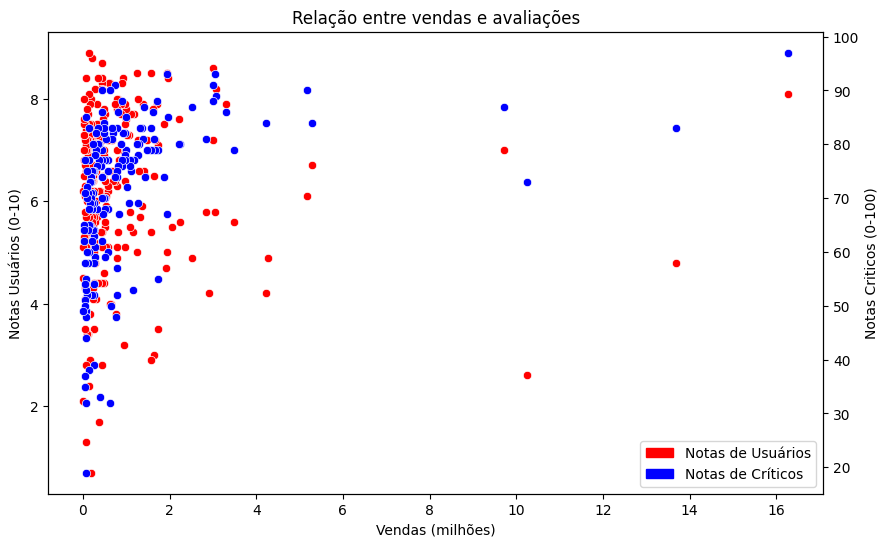

In [11]:
df_x360 = df_filtrado.query('platform == "X360"')

fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()
sns.scatterplot(data=df_x360, x="total_sales", y="user_score", 
                ax=ax1, color='red')
sns.scatterplot(data=df_x360, x="total_sales", y="critic_score", 
                ax=ax2, color='blue')
# Criar proxy artists para a legenda
red_patch = mpatches.Patch(color='red', label='Notas de Usuários')
blue_patch = mpatches.Patch(color='blue', label='Notas de Críticos')
plt.legend(handles=[red_patch, blue_patch])
ax1.set_xlabel('Vendas (milhões)')
ax1.set_ylabel('Notas Usuários (0-10)')
ax2.set_ylabel('Notas Criticos (0-100)')
plt.title('Relação entre vendas e avaliações')

plt.show()

In [12]:
corr = df_x360.corr()
print(f"a correlação entre avaliações dos usuários e as vendas é {corr['user_score']['total_sales']}")
print(f"a correlação entre avaliações dos criticos e as vendas é {corr['critic_score']['total_sales']}")
print(f"a correlação entre avaliações dos usuários e as avaliações dos criticos é {corr['user_score']['critic_score']}")

a correlação entre avaliações dos usuários e as vendas é 0.006314938203566579
a correlação entre avaliações dos criticos e as vendas é 0.3602659026138047
a correlação entre avaliações dos usuários e as avaliações dos criticos é 0.5579521194389434


Percebemos que a correlação entre avaliações e vendas é positiva, mas fraca.
a correlação de avaliação dos criticos e usuários, porém, é mais forte.

## Etapa 3.4: Descobrindo a popularidade de cada gênero

In [13]:
df_filtrado.groupby('genre')['total_sales'].sum().sort_values()

genre
Puzzle            4.80
Strategy          6.29
Adventure        23.10
Simulation       25.79
Fighting         41.80
Racing           50.06
Platform         58.60
Misc             79.58
Role-Playing    164.29
Sports          173.19
Shooter         288.13
Action          412.07
Name: total_sales, dtype: float64

os generos mais lucrativos são RPG, Sports, Shooter e action. descobrindo as avaliações de cada:

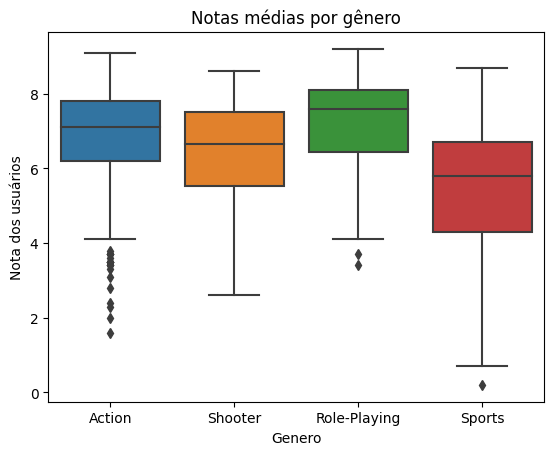

In [14]:
top_genres = list(df_filtrado.groupby('genre')['total_sales'].sum().sort_values().tail(4).index.values)
df_generos = df_filtrado.query('genre in @top_genres')
sns.boxplot(data=df_generos, x="genre", y="user_score")

plt.xlabel('Genero')
plt.ylabel('Nota dos usuários')
plt.title('Notas médias por gênero')
plt.show()


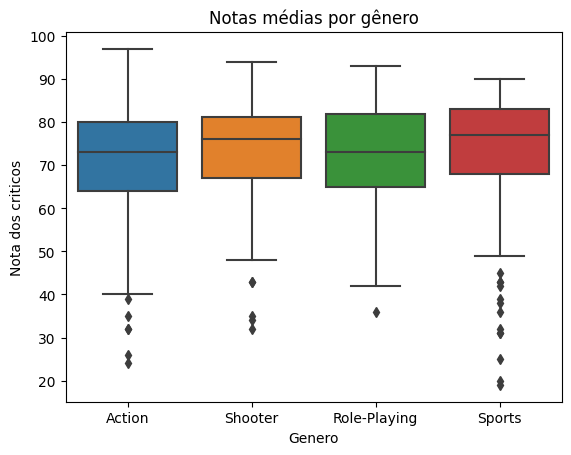

In [15]:
sns.boxplot(data=df_generos, x="genre", y="critic_score")
plt.xlabel('Genero')
plt.ylabel('Nota dos criticos')
plt.title('Notas médias por gênero')
plt.show()


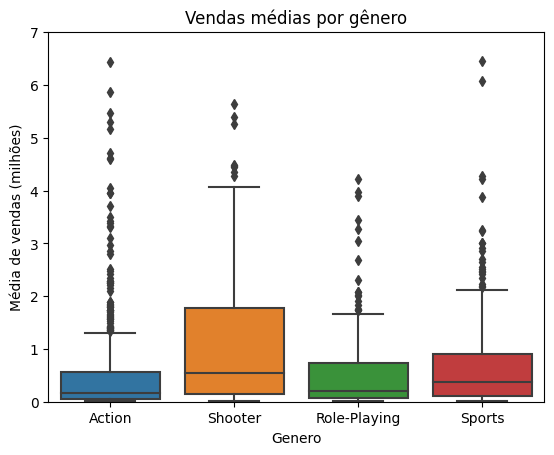

In [16]:
ax = sns.boxplot(data=df_generos, x="genre", y="total_sales")
ax.set_ylim(0, 7)
plt.xlabel('Genero')
plt.ylabel('Média de vendas (milhões)')
plt.title('Vendas médias por gênero')
plt.show()



In [17]:
#descobrindo quais generos são mais consistentemente lucrativos.
aggregated_data = df_generos.groupby('genre').agg(
    Soma_Vendas=('total_sales', 'sum'),
    Média_Vendas = ('total_sales', 'mean'),
    Media_User=('user_score', 'mean'),
    Desvio_Padrão_User = ('user_score', 'std'),
    Media_critics=('critic_score', 'mean'), 
    Desvio_Padrão_Critics = ('critic_score', 'std')
)
aggregated_data

,Soma_Vendas,Média_Vendas,Media_User,Desvio_Padrão_User,Media_critics,Desvio_Padrão_Critics
genre,,,,,,
Action,412.07,0.540774,6.805152,1.348629,71.028329,12.410557
Role-Playing,164.29,0.714304,7.219820,1.232353,72.171429,12.820099
Shooter,288.13,1.508534,6.439610,1.392671,73.030303,12.894131
Sports,173.19,0.787227,5.448521,1.713709,71.943548,16.111553


O genero "sports" possui um desvio maior enquanto notas de criticos e usuários, se mostrando um genero mais volátil.

Os generos rpg e action possuem um desvio menor enquanto notas, porém em sua maioria vendem menos.

O genero shooter tem notas elevadas, mantém desvio menor enquanto notas e possui a maior média de vendas dentre os demais.

# Etapa 4: Perfil de cada região

### Platform

In [18]:
# criando as séries das vendas por plataforma em cada região
top_plats_eu = df.groupby('platform')['eu_sales'].sum().sort_values(ascending = False)
top_plats_na = df.groupby('platform')['na_sales'].sum().sort_values(ascending = False)
top_plats_jp = df.groupby('platform')['jp_sales'].sum().sort_values(ascending = False)
# transformando em dataframes
top_plats = top_plats_eu.reset_index()
# concatenando dataframes
top_plats = top_plats.merge(top_plats_na.reset_index(), on = 'platform')
top_plats = top_plats.merge(top_plats_jp.reset_index(), on = 'platform')
# calculando as quotas de mercado
top_plats['EU_percentage'] = top_plats['eu_sales']/sum(top_plats['eu_sales'])
top_plats['NA_percentage'] = top_plats['na_sales']/sum(top_plats['na_sales'])
top_plats['JP_percentage'] = top_plats['jp_sales']/sum(top_plats['jp_sales'])


agora que tenho um dataframe com os dados das regiões por plataforma, posso encontrar as top 5 de cada uma e retirar os dados sobre elas

In [19]:
top_5_jp = top_plats.sort_values(by = 'jp_sales', ascending = False).head(5)
top_5_na = top_plats.sort_values(by = 'na_sales', ascending = False).head(5)
top_5_eu = top_plats.sort_values(by = 'eu_sales', ascending = False).head(5)
top_wrld = pd.concat([top_5_eu, top_5_na, top_5_jp])
top_wrld = top_wrld.drop_duplicates().reset_index(drop = True)
top_wrld

,platform,eu_sales,na_sales,jp_sales,EU_percentage,NA_percentage,JP_percentage
0,PS2,339.29,583.84,139.20,0.139963,0.132674,0.107296
1,PS3,330.29,393.49,80.19,0.136250,0.089418,0.061811
2,X360,270.76,602.47,12.43,0.111693,0.136907,0.009581
3,Wii,262.21,496.90,69.33,0.108166,0.112917,0.053440
4,PS,213.61,336.52,139.82,0.088118,0.076472,0.107774
5,DS,188.89,382.40,175.57,0.077920,0.086898,0.135331
6,SNES,19.04,61.23,116.55,0.007854,0.013914,0.089838
7,3DS,61.48,83.49,100.67,0.025362,0.018973,0.077597


top_wrld são as plataformas mais populares das três regiões

<AxesSubplot:xlabel='platform', ylabel='sales'>

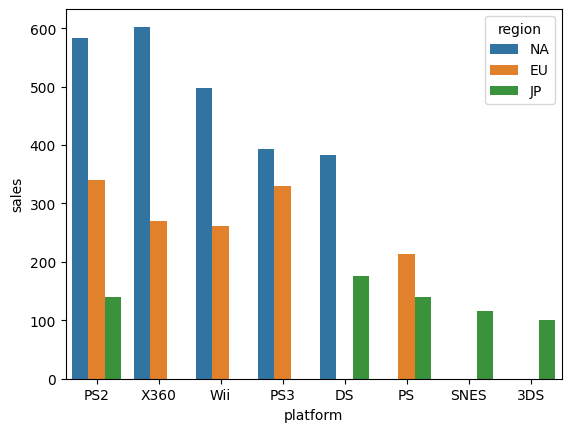

In [20]:

top_plats_eu = top_plats_eu.rename('sales').reset_index().head(5)
top_plats_jp = top_plats_jp.rename('sales').reset_index().head(5)
top_plats_na = top_plats_na.rename('sales').reset_index().head(5)
top_plats_eu['region'] = 'EU'
top_plats_jp['region'] = 'JP'
top_plats_na['region'] = 'NA'
top_5_plats = pd.concat([top_plats_na, top_plats_eu, top_plats_jp]).reset_index(drop = True)
sns.barplot(data = top_5_plats, x="platform", y="sales", hue ="region", order=['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS', 'SNES', '3DS'])


### genre

In [21]:
# criando as séries das vendas por genero em cada região
top_genre_eu = df.groupby('genre')['eu_sales'].sum().sort_values(ascending = False)
top_genre_na = df.groupby('genre')['na_sales'].sum().sort_values(ascending = False)
top_genre_jp = df.groupby('genre')['jp_sales'].sum().sort_values(ascending = False)
# transformando em dataframes
top_genre = top_genre_eu.reset_index()
# concatenando dataframes
top_genre = top_genre.merge(top_genre_na.reset_index(), on = 'genre')
top_genre = top_genre.merge(top_genre_jp.reset_index(), on = 'genre')
# calculando as quotas de mercado
top_genre['EU_percentage'] = top_genre['eu_sales']/sum(top_genre['eu_sales'])
top_genre['NA_percentage'] = top_genre['na_sales']/sum(top_genre['na_sales'])
top_genre['JP_percentage'] = top_genre['jp_sales']/sum(top_genre['jp_sales'])
top_genre

,genre,eu_sales,na_sales,jp_sales,EU_percentage,NA_percentage,JP_percentage
0,Action,519.13,879.01,161.43,0.214150,0.199749,0.124432
1,Sports,376.79,684.43,135.54,0.155432,0.155532,0.104475
2,Shooter,317.34,592.24,38.76,0.130908,0.134583,0.029877
3,Racing,236.51,359.35,56.71,0.097564,0.081660,0.043713
4,Misc,212.74,407.27,108.11,0.087759,0.092549,0.083332
5,Platform,200.35,445.50,130.83,0.082648,0.101237,0.100845
6,Role-Playing,188.71,330.81,355.41,0.077846,0.075174,0.273953
7,Simulation,113.52,181.92,63.80,0.046829,0.041340,0.049178
8,Fighting,100.33,223.36,87.48,0.041388,0.050757,0.067430
9,Adventure,63.54,105.26,52.30,0.026211,0.023920,0.040313


In [22]:
top_5_jp_genre = top_genre.sort_values(by = 'jp_sales', ascending = False).head(5)
top_5_na_genre = top_genre.sort_values(by = 'na_sales', ascending = False).head(5)
top_5_eu_genre = top_genre.sort_values(by = 'eu_sales', ascending = False).head(5)
top_wrld_genre = pd.concat([top_5_eu_genre, top_5_na_genre, top_5_jp_genre])
top_wrld_genre = top_wrld_genre.drop_duplicates().reset_index(drop = True)
top_wrld_genre

,genre,eu_sales,na_sales,jp_sales,EU_percentage,NA_percentage,JP_percentage
0,Action,519.13,879.01,161.43,0.214150,0.199749,0.124432
1,Sports,376.79,684.43,135.54,0.155432,0.155532,0.104475
2,Shooter,317.34,592.24,38.76,0.130908,0.134583,0.029877
3,Racing,236.51,359.35,56.71,0.097564,0.081660,0.043713
4,Misc,212.74,407.27,108.11,0.087759,0.092549,0.083332
5,Platform,200.35,445.50,130.83,0.082648,0.101237,0.100845
6,Role-Playing,188.71,330.81,355.41,0.077846,0.075174,0.273953


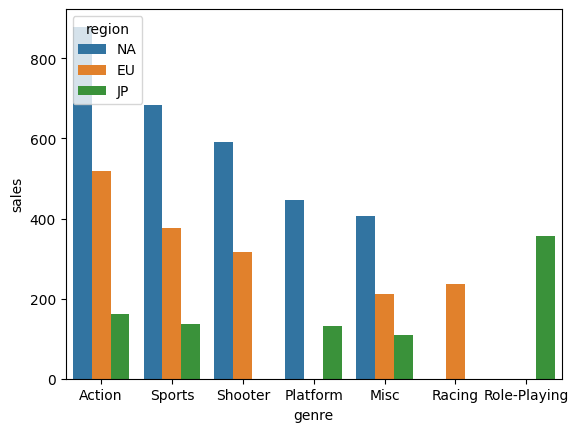

In [23]:
top_genre_eu = top_genre_eu.rename('sales').reset_index().head(5)
top_genre_jp = top_genre_jp.rename('sales').reset_index().head(5)
top_genre_na = top_genre_na.rename('sales').reset_index().head(5)
top_genre_eu['region'] = 'EU'
top_genre_jp['region'] = 'JP'
top_genre_na['region'] = 'NA'
top_5_plats_genre = pd.concat([top_genre_na, top_genre_eu, top_genre_jp]).reset_index(drop = True)
sns.barplot(data = top_5_plats_genre, x="genre", y="sales", hue ="region")
plt.show()

### ESRB

In [24]:
# criando as séries das vendas por genero em cada região
top_esrb_eu = df.groupby('rating')['eu_sales'].sum().sort_values(ascending = False)
top_esrb_na = df.groupby('rating')['na_sales'].sum().sort_values(ascending = False)
top_esrb_jp = df.groupby('rating')['jp_sales'].sum().sort_values(ascending = False)
# transformando em dataframes
top_esrb = top_esrb_eu.reset_index()
# concatenando dataframes
top_esrb = top_esrb.merge(top_esrb_na.reset_index(), on = 'rating')
top_esrb = top_esrb.merge(top_esrb_jp.reset_index(), on = 'rating')
# calculando as quotas de mercado
top_esrb['EU_percentage'] = top_esrb['eu_sales']/sum(top_esrb['eu_sales'])
top_esrb['NA_percentage'] = top_esrb['na_sales']/sum(top_esrb['na_sales'])
top_esrb['JP_percentage'] = top_esrb['jp_sales']/sum(top_esrb['jp_sales'])
top_esrb

,rating,eu_sales,na_sales,jp_sales,EU_percentage,NA_percentage,JP_percentage
0,E,710.25,1292.99,198.11,0.392221,0.409188,0.435015
1,M,483.97,748.48,64.24,0.267263,0.236869,0.141060
2,T,427.03,759.75,151.40,0.235819,0.240436,0.332448
3,E10+,188.52,353.32,40.20,0.104106,0.111814,0.088272
4,AO,0.61,1.26,0.00,0.000337,0.000399,0.000000
5,K-A,0.27,2.56,1.46,0.000149,0.000810,0.003206
6,EC,0.11,1.53,0.00,0.000061,0.000484,0.000000
7,RP,0.08,0.00,0.00,0.000044,0.000000,0.000000


In [25]:
top_5_jp_esrb = top_esrb.sort_values(by = 'jp_sales', ascending = False).head(5)
top_5_na_esrb = top_esrb.sort_values(by = 'na_sales', ascending = False).head(5)
top_5_eu_esrb = top_esrb.sort_values(by = 'eu_sales', ascending = False).head(5)
top_wrld_esrb = pd.concat([top_5_eu_esrb, top_5_na_esrb, top_5_jp_esrb])
top_wrld_esrb = top_wrld_esrb.drop_duplicates().reset_index(drop = True)
top_wrld_esrb

,rating,eu_sales,na_sales,jp_sales,EU_percentage,NA_percentage,JP_percentage
0,E,710.25,1292.99,198.11,0.392221,0.409188,0.435015
1,M,483.97,748.48,64.24,0.267263,0.236869,0.141060
2,T,427.03,759.75,151.40,0.235819,0.240436,0.332448
3,E10+,188.52,353.32,40.20,0.104106,0.111814,0.088272
4,AO,0.61,1.26,0.00,0.000337,0.000399,0.000000
5,K-A,0.27,2.56,1.46,0.000149,0.000810,0.003206


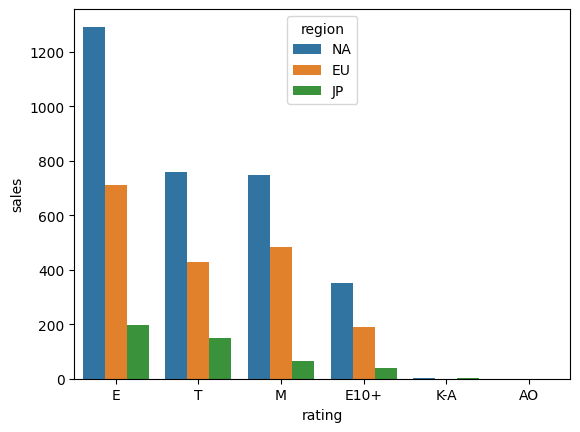

In [26]:
top_esrb_eu = top_esrb_eu.rename('sales').reset_index().head(5)
top_esrb_jp = top_esrb_jp.rename('sales').reset_index().head(5)
top_esrb_na = top_esrb_na.rename('sales').reset_index().head(5)
top_esrb_eu['region'] = 'EU'
top_esrb_jp['region'] = 'JP'
top_esrb_na['region'] = 'NA'
top_5_plats_esrb = pd.concat([top_esrb_na, top_esrb_eu, top_esrb_jp]).reset_index(drop = True)
sns.barplot(data = top_5_plats_esrb, x="rating", y="sales", hue ="region")
plt.show()

# Etapa 5: Testes de hipotese

Nesta etapa irei testar as hipoteses de que há diferença entre a avaliação dos jogadores de XOne e PC e que há diferença entre a avaliação dos jogos de ação e esportes.

as hipóteses nulas serão que a diferença entre plataforma ou genero não influenciam as avaliações.

o nível de significância (Alpha) escolhido foi de 0.05, por ser o padrão da indústria.

In [27]:
#criando df dos user_scores para XOne e PC
df_clear = df.dropna()

df_XOne = df_clear.query('year_of_release >= 2012 and platform == "XOne"')
df_PC = df_clear.query('year_of_release >= 2012 and platform == "PC"')

#calculando variância da amostra
var_XOne = df_XOne['user_score'].var()
var_PC = df_PC['user_score'].var()
print(var_XOne, var_PC)

alpha = .05

t_statistic_ind, p_value_ind = st.ttest_ind(df_XOne['user_score'], df_PC['user_score'], equal_var = (var_XOne == var_PC))

print(f"Valor P: {alpha}\nHipótese alternativa = Há diferença nas médias das duas amostras\nHipótese nula = Não há diferença nas médias")
if (p_value_ind < alpha):
    print("Resultado: H1, Rejeitamos a hipótese nula")
else:
    print("Resultado: H0, Não podemos rejeitar a hipótese nula")
p_value_ind

1.7914075312475122 2.8107168413784445
Valor P: 0.05
Hipótese alternativa = Há diferença nas médias das duas amostras
Hipótese nula = Não há diferença nas médias
Resultado: H0, Não podemos rejeitar a hipótese nula


0.49113501695475603


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- **Atenção**: não ficou claro para mim qual é a hipótese alternativa. Veja que na hipótese nula assumimos geralmente que não há diferença - médias iguais, já a hipótese alternativa é a negação de H0.
- É importante imprimir o p-valor

Precisamos seguir estes passos para o teste de hipótese:
- Definir a hipótese nula (ex: a altura média é igual entre homem e mulheres)
- Definir a hipótese alternativa (ex: a altura média não é igual entre homem e mulheres)
- Avaliar se as variâncias são iguais, por exemplo, calculando a variância da amostra e verificando a igualdade (ex: sample1.var() == sample2.var())
- Em seguida, ajustar equal_var=True no teste T se as variâncias forem iguais, senão usamos equal_var=False no teste T: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html.
- Avaliar o resultado do teste T

</div>


<div class="alert alert-block alert-success">
<b> Comentário do revisor V2: </b> <a class="tocSkip"></a>

Correto. Uma forma mais avançada de testar igualdade de variâncias é aplicar o Teste Levene: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
</div>

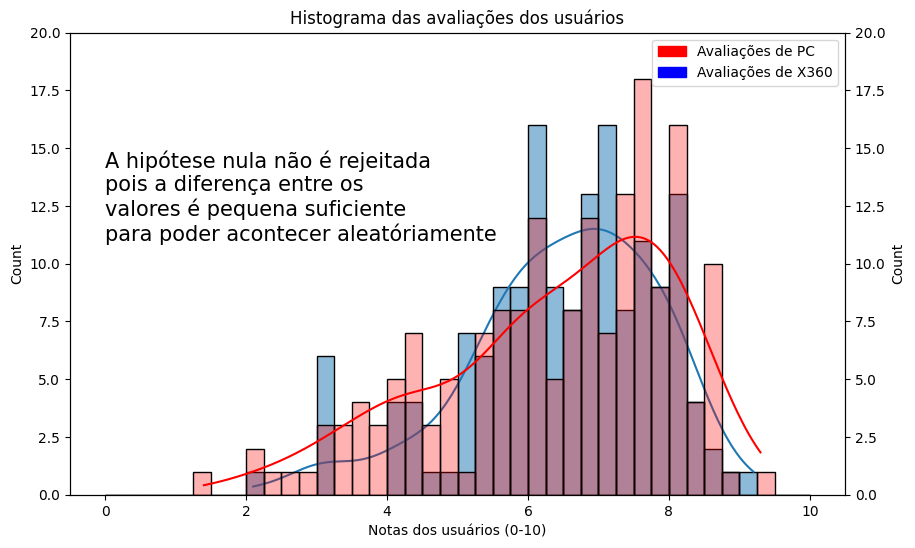

In [28]:
fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()
sns.histplot(df_PC, x = 'user_score', bins = 40, binrange = (0, 10), kde=True,color = 'red', alpha = 0.3, ax = ax2)
sns.histplot(df_XOne, x = 'user_score', bins = 40, binrange = (0, 10), kde=True, alpha = 0.5, ax = ax1)

# Criar proxy artists para a legenda

ax1.set_ylim(0,20)
ax2.set_ylim(0,20)
red_patch = mpatches.Patch(color='red', label='Avaliações de PC')
blue_patch = mpatches.Patch(color='blue', label='Avaliações de X360')
plt.legend(handles=[red_patch, blue_patch])
ax1.set_xlabel('Notas dos usuários (0-10)')
plt.title('Histograma das avaliações dos usuários')
plt.text(0, 11, 'A hipótese nula não é rejeitada\npois a diferença entre os\nvalores é pequena suficiente\npara poder acontecer aleatóriamente', fontsize=15)
plt.show()

In [29]:
#criando df dos user_scores para Action e Sports
df_clear = df.dropna()

df_Action = df_clear.query('year_of_release >= 2012 and genre == "Action"')
df_Sports = df_clear.query('year_of_release >= 2012 and genre == "Sports"')
#calculando variância da amostra
var_Action = df_Action['user_score'].var()
var_Sports = df_Sports['user_score'].var()

alpha = .05

t_statistic_ind, p_value_ind = st.ttest_ind(df_Action['user_score'], df_Sports['user_score'], equal_var = (var_Action == var_Sports))

print(f"Valor P: {alpha}\nHipótese alternativa = Há diferença nas médias das duas amostras\nHipótese nula = Não há diferença nas médias")
if (p_value_ind < alpha):
    print("Resultado: H1, Rejeitamos a hipótese nula")
else:
    print("Resultado: H0, Não podemos rejeitar a hipótese nula")

p_value_ind    

Valor P: 0.05
Hipótese alternativa = Há diferença nas médias das duas amostras
Hipótese nula = Não há diferença nas médias
Resultado: H1, Rejeitamos a hipótese nula


2.720666353664956e-13


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- **Atenção**: não ficou claro para mim qual é a hipótese alternativa. Veja que na hipótese nula assumimos geralmente que não há diferença - médias iguais, já a hipótese alternativa é a negação de H0.
- É importante imprimir o p-valor

Precisamos seguir estes passos para o teste de hipótese:
- Definir a hipótese nula (ex: a altura média é igual entre homem e mulheres)
- Definir a hipótese alternativa (ex: a altura média não é igual entre homem e mulheres)
- Avaliar se as variâncias são iguais, por exemplo, calculando a variância da amostra e verificando a igualdade (ex: sample1.var() == sample2.var())
- Em seguida, ajustar equal_var=True no teste T se as variâncias forem iguais, senão usamos equal_var=False no teste T: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html.
- Avaliar o resultado do teste T

</div>


<div class="alert alert-block alert-success">
<b> Comentário do revisor V2: </b> <a class="tocSkip"></a>

Correto
</div>

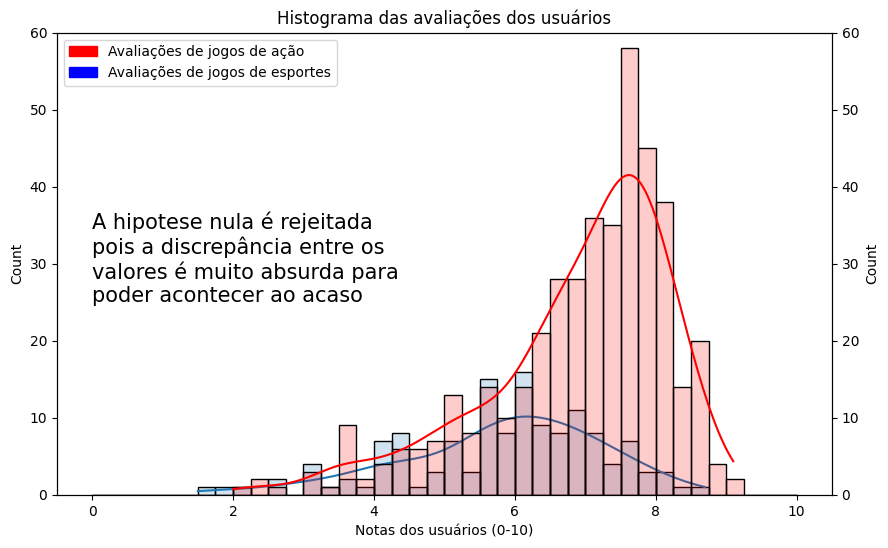

In [30]:
fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()
sns.histplot(df_Action, x = 'user_score', bins = 40, binrange = (0, 10), kde=True,color = 'red', alpha = 0.2, ax = ax2)
sns.histplot(df_Sports, x = 'user_score', bins = 40, binrange = (0, 10), kde=True, alpha = 0.2, ax = ax1)
ax1.set_ylim(0,60)

# editando legendas
ax1.set_ylim(0,60)
ax2.set_ylim(0,60)
red_patch = mpatches.Patch(color='red', label='Avaliações de jogos de ação')
blue_patch = mpatches.Patch(color='blue', label='Avaliações de jogos de esportes')
plt.legend(handles=[red_patch, blue_patch])
ax1.set_xlabel('Notas dos usuários (0-10)')
plt.title('Histograma das avaliações dos usuários')
plt.text(0, 25, 'A hipotese nula é rejeitada\npois a discrepância entre os\nvalores é muito absurda para\npoder acontecer ao acaso', fontsize=15)
plt.show()

# Etapa 6: Conclusão

Por meio da análise acima, os dados das vendas de jogos mundialmente, no periodo de tempo significativo para a empresa, mostram que a recepção de jogos para plataformas da mesma geração tendem a não diferirem muito, porém em gênero, sim. portanto a escolha do gênero dos jogos escolhidos para a campanha é de importância.
as plataformas da geração atual, que se mostram liderando em vendas são: X360, PS4, Wii, XOne e PS3 

Além disso, foi evidenciado que o mercado americano e europeu são muito semelhantes enquanto à popularidade de plataformas, gêneros e classificações etárias, porém o mercado japonês tem um publico muito distinto.

Finalmente, foi observado que o genero Shooter tem as notas mais elevadas entre criticos e usuários, com um desvio menor entre elas, e possui a maior média de vendas. é importante notar que os generos Roleplay e Action, enquanto não tão bem quanto Shooter, também demonstraram uma performance satisfatória entre notas e vendas.

**Concluo que a campanha de marketing deve focar nos jogos das plataformas da geração atual, do genero Shooter, Action e RPG, e focadas no publico europeu e americano.**